In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn import metrics
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')


from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV,KFold,LeaveOneOut,train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
# !pip install xgboost
#from xgboost import XGBRegressor,XGBClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MultiLabelBinarizer



## Load Data

In [2]:
df = pd.read_csv('clubmahindra.csv')

## Check dataset details

In [3]:
pd.options.display.max_columns = None
df.head(20)

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,Total member,Differnce of book /entry
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05-04-2018,05-04-2018,06-04-2018,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428,2,0
1,03930f033646d073462b35d411616323597715ac4fc398...,23-01-2015,11-04-2015,16-04-2015,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563,2,78
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28-01-2015,01-02-2015,05-02-2015,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602,2,4
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02-05-2015,11-06-2015,16-06-2015,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943,4,40
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02-09-2015,14-12-2015,19-12-2015,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346,2,103
5,cc8f05558362b7589004e57044e8b558bd228fc70da5b0...,01-12-2015,12-01-2016,13-01-2016,1,1,2,0,47,1,1,4,2,2.0,7.0,6,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d6...,8.167707,2,42
6,6827da5d76c626deeed81eb9f3afef635db4c17c9cbea0...,20-01-2016,20-01-2016,21-01-2016,3,1,2,0,46,2,7,4,1,3.0,7.0,9,1,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,B,A,ff5a1ae012afa5d4c889c50ad427aaf545d31a4fac04ff...,6.449838,2,0
7,b89547398bfff6b8e99939fbeb20ddb55aa2e43ebce9e4...,22-08-2016,20-10-2016,25-10-2016,1,1,2,2,46,1,1,2,5,3.0,7.0,6,4,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d6...,7.046172,4,59
8,3706793a0263706fe541b6e7f3b681be363f0b7e2bdc63...,10-09-2016,18-09-2016,24-09-2016,1,1,2,0,45,2,4,3,6,4.0,7.0,10,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,B,A,0b918943df0962bc7a1824c0555a389347b4febdc7cf9d...,5.394203,2,8
9,1f797a715ff7788cc8162fb033ee0eca345a2209b27593...,03-08-2016,21-11-2016,24-11-2016,1,1,2,0,45,1,5,4,4,3.0,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,6.561412,2,110


## Checking size of data

In [4]:
# Size of data
df.shape

(341424, 26)

## Feature in Dataset

In [5]:
df.columns

Index(['reservation_id', 'booking_date', 'checkin_date', 'checkout_date',
       'channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'memberid',
       'cluster_code', 'reservationstatusid_code', 'resort_id',
       'amount_spent_per_room_night_scaled', 'Total member',
       'Differnce of book /entry'],
      dtype='object')

## Checking the variable type

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341424 entries, 0 to 341423
Data columns (total 26 columns):
reservation_id                        341424 non-null object
booking_date                          341424 non-null object
checkin_date                          341424 non-null object
checkout_date                         341424 non-null object
channel_code                          341424 non-null int64
main_product_code                     341424 non-null int64
numberofadults                        341424 non-null int64
numberofchildren                      341424 non-null int64
persontravellingid                    341424 non-null int64
resort_region_code                    341424 non-null int64
resort_type_code                      341424 non-null int64
room_type_booked_code                 341424 non-null int64
roomnights                            341424 non-null int64
season_holidayed_code                 341310 non-null float64
state_code_residence                  33666

 Total data contain 341424 entries across 26 Important Features among which object type consist of 9 ,integer type consist of 14 and rest 3 are Float data type Features

## Missing Value in data

In [7]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [8]:
missing_values_table(df)

Your selected dataframe has 26 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
state_code_residence,4764,1.4
season_holidayed_code,114,0.0


From total 341424 entries there are 114 entries missing in season holiday code and 4764 in state code residence .

## Droping Feature

In [9]:
#### removing  id's here ie ; reservation_id and member_id
df = df.drop(columns = ['reservation_id','memberid'],axis=1)
df.shape

(341424, 24)

## Label Encoding

In [10]:
# Label Encoding Resort_id 
le = LabelEncoder()
df['resort_id'] = le.fit_transform(df['resort_id'])
df.cluster_code = df['cluster_code'].replace({'8':'G'})
df.tail(20)

,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,Total member,Differnce of book /entry
341404,20-02-2019,25-02-2019,27-02-2019,2,2,2,0,46,1,1,3,2,4.0,2.0,6,2,F,1,F,A,5,8.162431,2,5
341405,20-02-2019,21-02-2019,23-02-2019,3,3,2,0,47,3,3,4,2,4.0,12.0,5,2,B,1,F,A,14,4.564609,2,1
341406,20-02-2019,27-02-2019,02-03-2019,3,4,2,0,45,1,5,4,3,4.0,27.0,1,2,F,1,E,A,24,5.795287,2,7
341407,25-02-2019,26-02-2019,27-02-2019,1,4,2,0,45,1,1,4,1,4.0,27.0,1,2,F,1,E,A,13,6.892235,2,1
341408,20-02-2019,21-02-2019,23-02-2019,3,4,3,0,47,3,3,2,3,4.0,8.0,3,2,B,1,A,A,29,6.930148,3,1
341409,22-01-2019,23-02-2019,25-02-2019,2,4,3,0,45,1,1,3,2,4.0,10.0,1,3,C,1,E,A,13,7.617366,3,32
341410,21-02-2019,27-02-2019,28-02-2019,3,3,3,0,45,1,5,3,1,4.0,32.0,1,3,A,1,E,A,16,8.431742,3,6
341411,31-01-2019,21-02-2019,23-02-2019,2,3,4,0,4752,2,2,4,4,3.0,5.0,2,2,F,1,D,A,19,8.346030,4,21
341412,21-02-2019,23-02-2019,26-02-2019,3,4,3,0,47,2,4,3,3,3.0,4.0,13,2,D,1,B,A,17,8.005093,3,2
341413,21-02-2019,24-02-2019,26-02-2019,2,3,2,0,45,1,1,2,2,4.0,10.0,6,2,B,2,F,A,22,8.491895,2,3


## Looking at other Features

In [11]:
# Channel code in data
df.channel_code.value_counts()

1    161225
3    128042
2     52157
Name: channel_code, dtype: int64

In [12]:
# Main product code in data
df.main_product_code.value_counts()

2    177615
3     86247
1     57822
4     18619
7      1121
Name: main_product_code, dtype: int64

In [13]:
# No of Adults in data
df.numberofadults.value_counts()

2     149414
4      84468
3      63247
6      20052
5       9849
8       5198
7       2673
9       1445
1       1280
10      1256
12      1010
11       357
16       293
14       216
15       207
13       120
24        83
20        64
18        62
0         27
17        20
22        19
19        12
25        12
21        11
23        10
32        10
30         9
Name: numberofadults, dtype: int64

In [14]:
# No of Children 
df.numberofchildren.value_counts()

0     264250
1      37766
2      35164
3       2137
4       1658
6        187
5        181
8         44
7         20
10        14
12         2
13         1
Name: numberofchildren, dtype: int64

In [15]:
# Null Value in Season Holiday Code
df[df['season_holidayed_code'].isnull()]

,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,Total member,Differnce of book /entry
296,01-02-2016,18-05-2016,22-05-2016,1,1,2,2,45,1,1,2,4,NaN,15.0,6,4,C,1,F,A,5,8.197141,4,107
1081,01-02-2016,22-05-2016,25-05-2016,1,1,4,0,45,1,1,2,3,NaN,8.0,6,2,G,1,F,B,5,7.221797,4,111
21702,08-05-2016,17-05-2016,21-05-2016,1,1,3,1,45,1,1,2,4,NaN,2.0,6,4,E,1,F,A,5,6.627826,4,9
25387,03-05-2016,21-05-2016,26-05-2016,3,3,3,0,45,1,1,3,5,NaN,10.0,6,3,D,1,F,A,5,8.128805,3,18
26818,03-05-2016,23-05-2016,25-05-2016,3,3,2,0,45,1,1,3,3,NaN,1.0,6,5,H,1,F,A,5,7.731696,2,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248528,11-05-2016,19-05-2016,20-05-2016,3,3,2,0,46,1,1,3,1,NaN,7.0,6,2,B,1,F,A,5,10.201021,2,8
248780,12-05-2016,17-05-2016,20-05-2016,1,1,4,1,45,1,1,3,6,NaN,2.0,6,2,E,1,F,A,5,7.684738,5,5
249116,14-05-2016,19-05-2016,20-05-2016,1,2,4,1,45,1,1,3,2,NaN,1.0,6,2,F,1,F,A,5,8.632905,5,5
249288,15-05-2016,17-05-2016,20-05-2016,1,2,3,1,45,1,1,3,6,NaN,2.0,6,2,E,1,F,A,5,8.478097,4,2


In [16]:
# Dropping all Missing value
df.dropna(inplace = True)
df.isnull().sum()

booking_date                          0
checkin_date                          0
checkout_date                         0
channel_code                          0
main_product_code                     0
numberofadults                        0
numberofchildren                      0
persontravellingid                    0
resort_region_code                    0
resort_type_code                      0
room_type_booked_code                 0
roomnights                            0
season_holidayed_code                 0
state_code_residence                  0
state_code_resort                     0
total_pax                             0
member_age_buckets                    0
booking_type_code                     0
cluster_code                          0
reservationstatusid_code              0
resort_id                             0
amount_spent_per_room_night_scaled    0
Total member                          0
Differnce of book /entry              0
dtype: int64

### Checking for Zero Person  Entries

In [17]:
df['total_person'] = df['numberofadults']  + df['numberofchildren']
df[df['total_person']==0].shape

(23, 25)

### Checking for negative roomnights

In [18]:
df[df['roomnights']<0].shape

(1, 25)

There are 23 such entries were Booking was there But no one enter the room No adult and No child still the Amount was charge.Similar there is single entry where no one leaved for zero day that is not possible .So now we will drop these entries

### Changing Date to data time Data type

In [19]:
df['checkin_date'] = df['checkin_date'].astype('datetime64[ns]')
df['booking_date'] = df['booking_date'].astype('datetime64[ns]')
df['checkout_date'] = df['checkout_date'].astype('datetime64[ns]')

### Making new columns to confirm date deformities

In [20]:
# Checking How many day before Customer book resort
df['book_checkin_diff']  = df['checkin_date']  - df['booking_date']
df['book_checkout_diff']  = df['checkout_date']  - df['booking_date']

# Checking How many day Customer lived inresort
df['chickin_checkout_diff']  =df['checkout_date'] -  df['checkin_date']  

### Checking date deformities

In [21]:
# Booking checking Diffrence
df[df['book_checkin_diff']< '0 days'].shape

(73732, 28)

In [22]:
# checking checkout Diffrence
df[df['chickin_checkout_diff']<'0 days'].shape

(45513, 28)

In [23]:
# Booking checkout Diffrence
df[df['book_checkout_diff']<'0 days'].shape

(75810, 28)

In date deformities we observe some key point i.e in Booking checking difference it were seen in 73732 entries the day was less then zero there were no date difference in it ,Similarly in checking checkout there were 45513 entries where customer  stayed less then zero while in booking checking difference there were 75810 entries where customer booking were less then Zero all these are nothing but error in data.So,Best option will be to drop these entries.

## Checking Relation Between Date and Target Feature

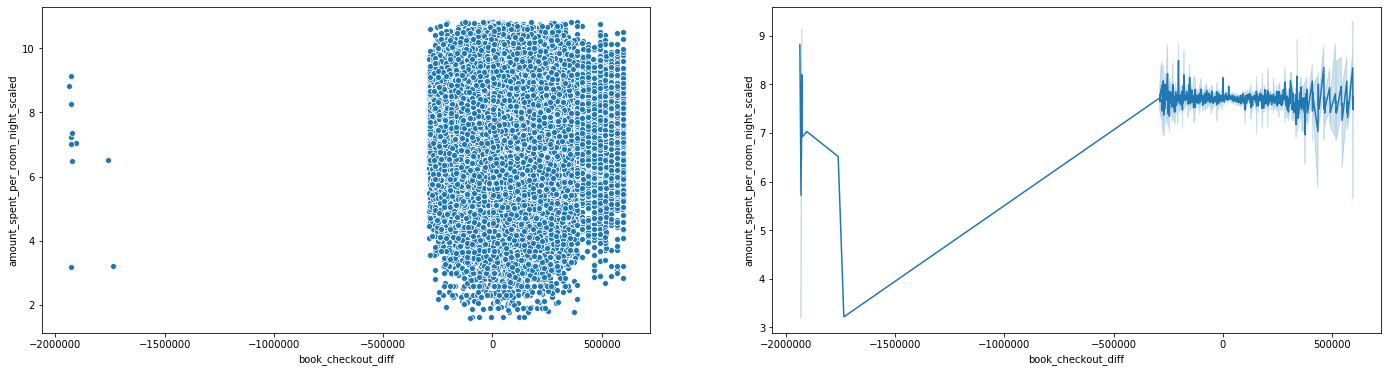

In [24]:
# Checking relation in Booking checkout difference and amount spent per room

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (24, 6))
sns.scatterplot(x=(df['book_checkout_diff'].astype('int64'))/10**11,y=df['amount_spent_per_room_night_scaled'],ax=ax1)


sns.lineplot(x=(df['book_checkout_diff'].astype('int64'))/10**11,y=df['amount_spent_per_room_night_scaled'],ax=ax2)
plt.show()


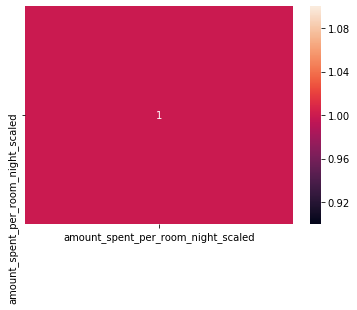

In [25]:
# Checking Correlation 
sns.heatmap(df[['book_checkout_diff','amount_spent_per_room_night_scaled']].corr(),annot=True)
plt.show()

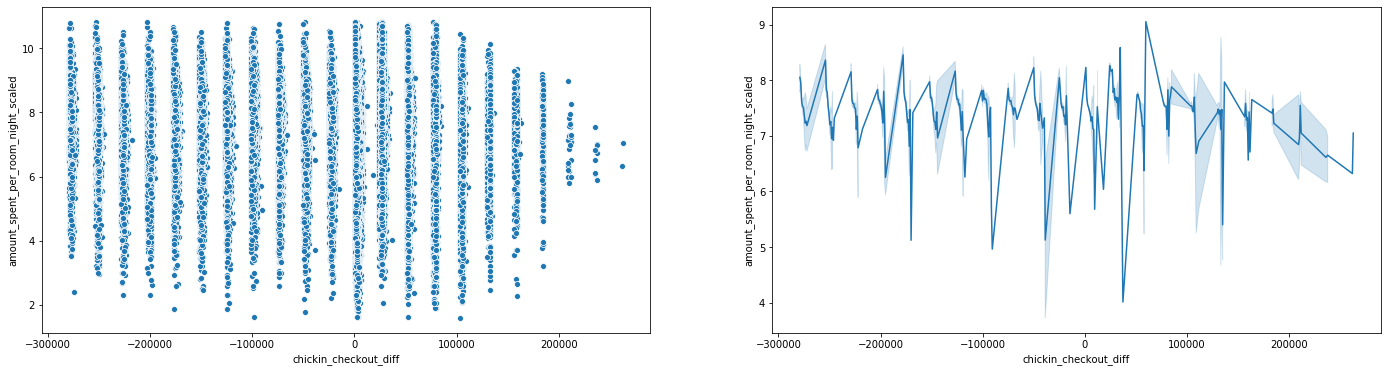

In [26]:
# Checking relation in Checkin checkout difference and amount spent per room

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (24, 6))

sns.scatterplot(x=(df['chickin_checkout_diff'].astype('int64'))/10**11,y=df['amount_spent_per_room_night_scaled'],ax=ax1)


sns.lineplot(x=(df['chickin_checkout_diff'].astype('int64'))/10**11,y=df['amount_spent_per_room_night_scaled'],ax=ax2)
plt.show()

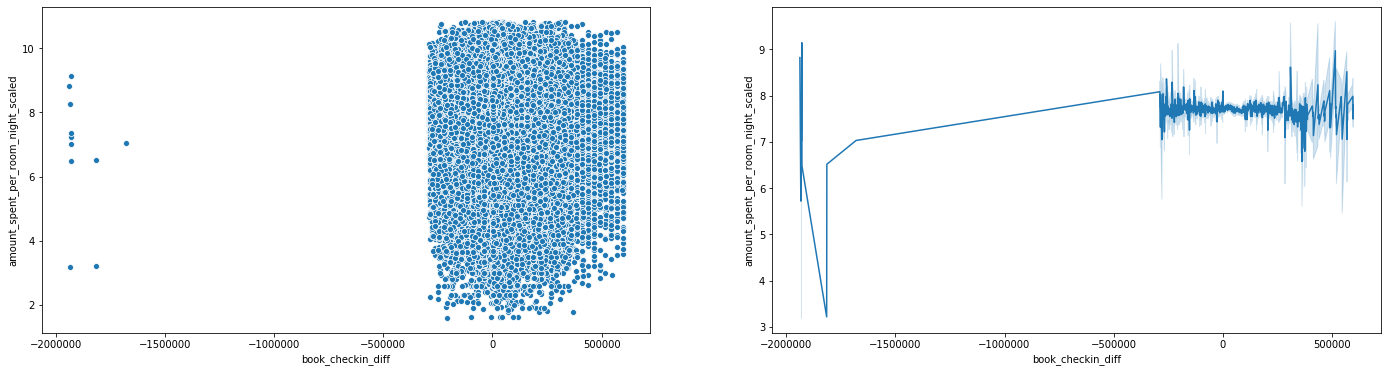

In [27]:
# Checking relation in Booking checkin difference and amount spent per room

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (24, 6))

sns.scatterplot(x=(df['book_checkin_diff'].astype('int64'))/10**11,y=df['amount_spent_per_room_night_scaled'],ax=ax1)

sns.lineplot(x=(df['book_checkin_diff'].astype('int64'))/10**11,y=df['amount_spent_per_room_night_scaled'],ax=ax2)
plt.show()


Above plot show no correlation between any of the date Feature and the target Feature even the correlation speak some invalid stuff.

## Creating Column Crowd Difference

In [28]:
df['crowd_difference'] = df['total_person'] - df['total_pax']
df.head()

,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,Total member,Differnce of book /entry,total_person,book_checkin_diff,book_checkout_diff,chickin_checkout_diff,crowd_difference
0,2018-05-04,2018-05-04,2018-06-04,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,F,1,F,C,7,7.706428,2,0,2,0 days,31 days,31 days,-1
1,2015-01-23,2015-11-04,2015-04-16,1,1,2,0,46,3,3,4,5,2.0,7.0,5,2,F,1,F,A,1,6.662563,2,78,2,285 days,83 days,-202 days,0
2,2015-01-28,2015-01-02,2015-05-02,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,E,A,9,7.871602,2,4,2,-26 days,94 days,120 days,0
3,2015-02-05,2015-11-06,2015-06-16,1,1,2,2,46,2,2,3,5,2.0,7.0,2,2,F,1,D,A,25,5.344943,4,40,4,274 days,131 days,-143 days,2
4,2015-02-09,2015-12-14,2015-12-19,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,D,A,25,7.059346,2,103,2,308 days,313 days,5 days,0


In [29]:
df[df['crowd_difference']<0].shape

(86911, 29)

Total pax is feature in data which show total of No of adult and No of Children enter the resort where as crowd difference is created feature adding  No of adult and No of Children enter the resort So we were expecting it difference to be zero but in 86911 entries it was less then zero.

## Droping some negative entries

In [30]:
# Droping booking_date , book_checkout_diff  and book_checkin_diff Feature 
df.drop(columns=['booking_date','book_checkout_diff','book_checkin_diff'],axis=1,inplace=True)

In [31]:
##df.sample(frac  = 1/6,replace=False,random_state=0 )

In [32]:
# Remove negative value 'chickin_checkout_diff'
df = df[~(df['chickin_checkout_diff'] < '0')]

In [33]:
# removing -ve value in roomnights

df = df[~(df['roomnights'] <0)]# using inverse ~ of the condition
df[df['roomnights']<0]

,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,Total member,Differnce of book /entry,total_person,chickin_checkout_diff,crowd_difference


In [34]:
# removing 'crowd_difference' with 0 value
df = df[df['total_person']!=0]

In [35]:
# remove 'crowd_difference' and 'total_person' columns

df = df.drop(['crowd_difference','total_person'],axis=1)

In [36]:
df.shape

(291013, 24)

## Checking Normality of Target  Feature

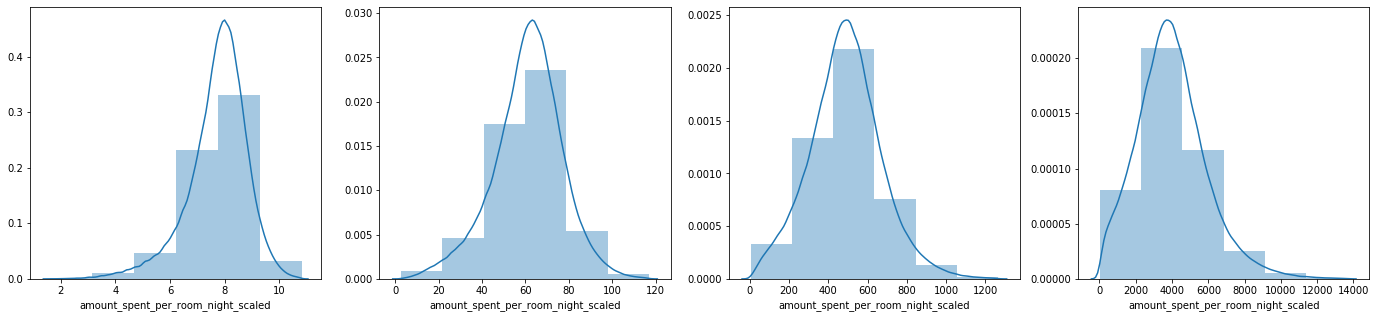

In [37]:
#Performing Transformation and Visualization

fig, a=plt.subplots(1,4,figsize=(24,5))

sns.distplot(df['amount_spent_per_room_night_scaled'],bins=6,ax=a[0])
sns.distplot(df['amount_spent_per_room_night_scaled']**2,bins=6,ax=a[1])
sns.distplot(df['amount_spent_per_room_night_scaled']**3,bins=6,ax=a[2])
sns.distplot(df['amount_spent_per_room_night_scaled']**4,bins=6,ax=a[3])
plt.show()

In [38]:
#Statistically Verifying the Normality of Target by Jarque bera

print(stats.jarque_bera(df['amount_spent_per_room_night_scaled']))
print(stats.jarque_bera(df['amount_spent_per_room_night_scaled']**2))
print(stats.jarque_bera(df['amount_spent_per_room_night_scaled']**3))
print(stats.jarque_bera(df['amount_spent_per_room_night_scaled']**4))

(79860.1992170471, 0.0)
(7232.834184275199, 0.0)
(4147.485176308387, 0.0)
(33424.45669879226, 0.0)


Above observations,We can see that targer variable with power 3 is giving best result though it is not normal but better than others 4149.7487047329705 > 5.99 therefore it is not perfectaly normal

In [39]:
#df['amount_spent_per_room_night_scaled'].nunique()

## Checking Normality of Residual - Jarque Bera Test Using OLS (As No of Obs  > 2000) 

In [40]:
df.drop(['chickin_checkout_diff','checkin_date', 'checkout_date'],axis=1,inplace = True)

In [41]:
y = df['amount_spent_per_room_night_scaled']
x = df.drop('amount_spent_per_room_night_scaled',axis=1)

In [42]:
df.columns

Index(['channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'cluster_code',
       'reservationstatusid_code', 'resort_id',
       'amount_spent_per_room_night_scaled', 'Total member',
       'Differnce of book /entry'],
      dtype='object')

In [43]:
x = pd.get_dummies(data=x,columns=['channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'cluster_code',
       'reservationstatusid_code'])

x.head()

,resort_id,Total member,Differnce of book /entry,channel_code_1,channel_code_2,channel_code_3,main_product_code_1,main_product_code_2,main_product_code_3,main_product_code_4,main_product_code_7,numberofadults_1,numberofadults_2,numberofadults_3,numberofadults_4,numberofadults_5,numberofadults_6,numberofadults_7,numberofadults_8,numberofadults_9,numberofadults_10,numberofadults_11,numberofadults_12,numberofadults_13,numberofadults_14,numberofadults_15,numberofadults_16,numberofadults_17,numberofadults_18,numberofadults_19,numberofadults_20,numberofadults_21,numberofadults_22,numberofadults_23,numberofadults_24,numberofadults_25,numberofadults_30,numberofadults_32,numberofchildren_0,numberofchildren_1,numberofchildren_2,numberofchildren_3,numberofchildren_4,numberofchildren_5,numberofchildren_6,numberofchildren_7,numberofchildren_8,numberofchildren_10,numberofchildren_13,persontravellingid_45,persontravellingid_46,persontravellingid_47,persontravellingid_4752,persontravellingid_4753,persontravellingid_4995,resort_region_code_1,resort_region_code_2,resort_region_code_3,resort_type_code_0,resort_type_code_1,resort_type_code_2,resort_type_code_3,resort_type_code_4,resort_type_code_5,resort_type_code_7,room_type_booked_code_1,room_type_booked_code_2,room_type_booked_code_3,room_type_booked_code_4,room_type_booked_code_5,room_type_booked_code_6,roomnights_0,roomnights_1,roomnights_2,roomnights_3,roomnights_4,roomnights_5,roomnights_6,roomnights_7,roomnights_8,roomnights_9,roomnights_10,roomnights_11,roomnights_12,roomnights_13,roomnights_14,roomnights_15,roomnights_16,roomnights_17,roomnights_18,roomnights_19,roomnights_20,roomnights_21,roomnights_22,roomnights_23,roomnights_24,roomnights_25,roomnights_26,roomnights_27,roomnights_28,roomnights_29,roomnights_30,roomnights_31,roomnights_32,roomnights_33,roomnights_34,roomnights_35,roomnights_36,roomnights_37,roomnights_39,roomnights_41,roomnights_42,roomnights_47,roomnights_60,season_holidayed_code_1.0,season_holidayed_code_2.0,season_holidayed_code_3.0,season_holidayed_code_4.0,state_code_residence_1.0,state_code_residence_2.0,state_code_residence_3.0,state_code_residence_4.0,state_code_residence_5.0,state_code_residence_6.0,state_code_residence_7.0,state_code_residence_8.0,state_code_residence_9.0,state_code_residence_10.0,state_code_residence_11.0,state_code_residence_12.0,state_code_residence_13.0,state_code_residence_14.0,state_code_residence_15.0,state_code_residence_16.0,state_code_residence_18.0,state_code_residence_19.0,state_code_residence_20.0,state_code_residence_21.0,state_code_residence_22.0,state_code_residence_23.0,state_code_residence_24.0,state_code_residence_25.0,state_code_residence_26.0,state_code_residence_27.0,state_code_residence_28.0,state_code_residence_29.0,state_code_residence_30.0,state_code_residence_31.0,state_code_residence_32.0,state_code_residence_33.0,state_code_residence_34.0,state_code_residence_35.0,state_code_residence_36.0,state_code_residence_37.0,state_code_residence_38.0,state_code_resort_1,state_code_resort_2,state_code_resort_3,state_code_resort_4,state_code_resort_5,state_code_resort_6,state_code_resort_7,state_code_resort_9,state_code_resort_10,state_code_resort_11,state_code_resort_13,total_pax_0,total_pax_1,total_pax_2,total_pax_3,total_pax_4,total_pax_5,total_pax_6,total_pax_7,total_pax_8,total_pax_9,total_pax_10,total_pax_11,total_pax_12,total_pax_13,total_pax_14,total_pax_20,total_pax_21,total_pax_24,member_age_buckets_A,member_age_buckets_B,member_age_buckets_C,member_age_buckets_D,member_age_buckets_E,member_age_buckets_F,member_age_buckets_G,member_age_buckets_H,member_age_buckets_I,member_age_buckets_J,booking_type_code_1,booking_type_code_2,cluster_code_A,cluster_code_B,cluster_code_C,cluster_code_D,cluster_code_E,cluster_code_F,reservationstatusid_code_A,reservationstatusid_code_B,reservationstatusid_code_C
0,7,2,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0

In [44]:
X_constant = sm.add_constant(x)

In [45]:
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     amount_spent_per_room_night_scaled   R-squared:                       0.113
Model:                                            OLS   Adj. R-squared:                  0.112
Method:                                 Least Squares   F-statistic:                     204.9
Date:                                Thu, 02 Jul 2020   Prob (F-statistic):               0.00
Time:                                        19:08:55   Log-Likelihood:            -4.2139e+05
No. Observations:                              291013   AIC:                         8.431e+05
Df Residuals:                                  290832   BIC:                         8.451e+05
Df Model:                                         180                                         
Covariance Type:                            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          2.0157      0.044     45.721      0.000       1.929       2.102
resort_id                     -0.0081      0.000    -27.014      0.000      -0.009      -0.007
Total member                   0.0314      0.007      4.258      0.000       0.017       0.046
Differnce of book /entry      -0.0010   5.43e-05    -18.207      0.000      -0.001      -0.001
channel_code_1                 0.5767      0.015     38.525      0.000       0.547       0.606
channel_code_2                 0.7505      0.015     49.513      0.000       0.721       0.780
channel_code_3                 0.6884      0.015     45.919      0.000       0.659       0.718
main_product_code_1            0.5854      0.012     48.924      0.000       0.562       0.609
main_product_code_2            0.4706      0.011     41.072      0.000       0.448       0.493
main_product_code_3            0.3542      0.012     30.485      0.000       0.331       0.377
main_product_code_4            0.2260      0.013     17.266      0.000       0.200       0.252
main_product_code_7            0.3795      0.028     13.416      0.000       0.324       0.435
numberofadults_1              -0.0349      0.077     -0.453      0.651      -0.186       0.116
numberofadults_2               0.0756      0.065      1.159      0.246      -0.052       0.203
numberofadults_3               0.1410      0.059      2.400      0.016       0.026       0.256
numberofadults_4               0.2273      0.052      4.334      0.000       0.125       0.330
numberofadults_5               0.3672      0.048      7.725      0.000       0.274       0.460
numberofadults_6               0.3806      0.042      9.165      0.000       0.299       0.462
numberofadults_7               0.4293      0.041     10.388      0.000       0.348       0.510
numberofadults_8               0.4134      0.035     11.733      0.000       0.344       0.482
numberofadults_9               0.5377      0.041     13.198      0.000       0.458       0.618
numberofadults_10              0.5782      0.041     13.976      0.000       0.497       0.659
numberofadults_11              0.3958      0.066      6.037      0.000       0.267       0.524
numberofadults_12              0.5053      0.047     10.811      0.000       0.414       0.597
numberofadults_13              0.5769      0.109      5.281      0.000       0.363       0.791
numberofadults_14              0.5779      0.083      6.941      0.000       0.415       0.741
numberofadults_15              0.2874      0.091      3.150      0.002       0.109       0.466
numberofadults_16              0.3613      0.081      4.4

In [46]:
#Statistically Verifying the Residual Normality by Jarque bera

print(stats.jarque_bera(lin_reg.resid))

(138705.9400620473, 0.0)


We can see the value is far more than 13.8946340364 > 5.99 therefore we can state it's not Normal

In [47]:
# #Statistically Verifying the Residual Normality by Jarque bera after transformating it

print(stats.jarque_bera(lin_reg.resid**1/2))
print(stats.jarque_bera(lin_reg.resid**1/3))

(138705.9400620473, 0.0)
(138705.94006204774, 0.0)


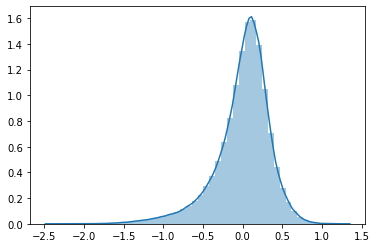

In [48]:
# Transforming and Visualization Residual 

sns.distplot(lin_reg.resid**1/3)
plt.show()

We can Clearly see that by increasing the root value there is no change in normality and by increasing power it is deflecting far from Normality

### Cubing Target Variable and Checking Normality of Residual

In [49]:
y_3 = df['amount_spent_per_room_night_scaled']**3

In [50]:
lin_reg_3 = sm.OLS(y_3,X_constant).fit()

In [51]:
lin_reg_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     amount_spent_per_room_night_scaled   R-squared:                       0.139
Model:                                            OLS   Adj. R-squared:                  0.139
Method:                                 Least Squares   F-statistic:                     261.7
Date:                                Thu, 02 Jul 2020   Prob (F-statistic):               0.00
Time:                                        19:09:10   Log-Likelihood:            -1.9057e+06
No. Observations:                              291013   AIC:                         3.812e+06
Df Residuals:                                  290832   BIC:                         3.814e+06
Df Model:                                         180                                         
Covariance Type:                            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        155.1051      7.236     21.436      0.000     140.924     169.287
resort_id                     -1.3103      0.049    -26.747      0.000      -1.406      -1.214
Total member                   5.8606      1.210      4.842      0.000       3.488       8.233
Differnce of book /entry      -0.1940      0.009    -21.759      0.000      -0.211      -0.176
channel_code_1                32.9260      2.457     13.401      0.000      28.110      37.742
channel_code_2                68.3816      2.488     27.488      0.000      63.506      73.257
channel_code_3                53.7975      2.461     21.863      0.000      48.975      58.620
main_product_code_1           64.0864      1.964     32.635      0.000      60.238      67.935
main_product_code_2           43.6292      1.880     23.201      0.000      39.944      47.315
main_product_code_3           22.8054      1.907     11.960      0.000      19.068      26.543
main_product_code_4            1.6857      2.149      0.785      0.433      -2.525       5.897
main_product_code_7           22.8985      4.643      4.932      0.000      13.799      31.998
numberofadults_1             -46.9072     12.648     -3.709      0.000     -71.696     -22.118
numberofadults_2             -28.6030     10.703     -2.672      0.008     -49.581      -7.625
numberofadults_3             -16.2606      9.646     -1.686      0.092     -35.166       2.645
numberofadults_4               1.7504      8.608      0.203      0.839     -15.121      18.622
numberofadults_5              31.0667      7.803      3.981      0.000      15.773      46.360
numberofadults_6              38.2324      6.816      5.609      0.000      24.873      51.591
numberofadults_7              51.1345      6.783      7.539      0.000      37.841      64.428
numberofadults_8              50.3727      5.783      8.711      0.000      39.038      61.707
numberofadults_9              76.3842      6.687     11.423      0.000      63.279      89.490
numberofadults_10             88.5890      6.790     13.047      0.000      75.281     101.897
numberofadults_11             66.9005     10.761      6.217      0.000      45.810      87.991
numberofadults_12             83.1955      7.671     10.846      0.000      68.161      98.230
numberofadults_13            109.5137     17.931      6.108      0.000      74.370     144.658
numberofadults_14            103.9199     13.666      7.604      0.000      77.134     130.705
numberofadults_15             41.6605     14.976      2.782      0.005      12.308      71.013
numberofadults_16             75.0686     13.350      5.6

Though after cubing the Residual we can't see any positive evidence of going with it as 
Jarque-Bera (JB):	6433.790 > 5.99 which means it still not normal so rather it will be good if we stick to original Target skewness

## Binning and Labelling Target Feature

In [52]:
bins = [0,2,4,6,8,10]
labels = ['a','b','c','d','e']

In [53]:
df['binned_amount_spent_per_room_night_scaled'] = pd.cut(df['amount_spent_per_room_night_scaled'],bins,labels=labels)
df.head()

,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,Total member,Differnce of book /entry,binned_amount_spent_per_room_night_scaled
0,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,F,1,F,C,7,7.706428,2,0,d
2,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,E,A,9,7.871602,2,4,d
4,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,D,A,25,7.059346,2,103,d
6,3,1,2,0,46,2,7,4,1,3.0,7.0,9,1,F,1,B,A,31,6.449838,2,0,d
7,1,1,2,2,46,1,1,2,5,3.0,7.0,6,4,F,1,F,A,22,7.046172,4,59,d


In [54]:
df.binned_amount_spent_per_room_night_scaled.value_counts()

d    142543
e    126135
c     18344
b      1931
a        24
Name: binned_amount_spent_per_room_night_scaled, dtype: int64

# Sampling and Statistical Analysis

In [55]:
df.head()

,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,roomnights,season_holidayed_code,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,Total member,Differnce of book /entry,binned_amount_spent_per_room_night_scaled
0,3,1,2,0,46,3,3,3,1,2.0,7.0,3,3,F,1,F,C,7,7.706428,2,0,d
2,1,1,2,0,47,1,5,4,4,2.0,7.0,1,2,F,1,E,A,9,7.871602,2,4,d
4,1,1,2,0,46,2,2,4,5,2.0,7.0,2,2,F,1,D,A,25,7.059346,2,103,d
6,3,1,2,0,46,2,7,4,1,3.0,7.0,9,1,F,1,B,A,31,6.449838,2,0,d
7,1,1,2,2,46,1,1,2,5,3.0,7.0,6,4,F,1,F,A,22,7.046172,4,59,d


In [56]:
# for statistical analysis purpose convert all numerical variables into object

df.select_dtypes(['int64','float64']).columns

Index(['channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'booking_type_code', 'amount_spent_per_room_night_scaled',
       'Total member', 'Differnce of book /entry'],
      dtype='object')

In [57]:
df[['channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'booking_type_code', 'resort_id']] = df[['channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'booking_type_code', 'resort_id']].astype('category')

In [58]:
# Defining sample and population

sample = df.sample(n = 240**2,replace = False,random_state=0 ) 

population = df

### Checking statistically Whether sample is correct representation of population

* H0= Proportions of Sample  = Proportions of Population

* H1 = Proportions of Sample  != Proportions of Population

In [59]:
# Using Chi-Square test 

for i in list(sample.columns) :
    if sample[i].nunique()==population[i].nunique():
            print(i,' \n',st.chi2_contingency(np.array(list(sample[i].value_counts())  + list(population[i].value_counts())).reshape(2,sample[i].nunique())))

channel_code  
 (0.8834905687526632, 0.6429133746823734, 2, array([[ 26842.64786454,  21819.11058968,   8938.24154578],
       [135617.35213546, 110236.88941032,  45158.75845422]]))
main_product_code  
 (2.49804170870372, 0.6449864896430177, 4, array([[ 29816.22372086,  14608.63937948,   9827.81938711,
          3151.02879124,    196.2887213 ],
       [150640.77627914,  73807.36062052,  49653.18061289,
         15919.97120876,    991.7112787 ]]))
numberofadults  
 (16.22812956957831, 0.9305559813446386, 26, array([[2.52858866e+04, 1.42344020e+04, 1.06450282e+04, 3.36681420e+03,
        1.63739161e+03, 8.74542257e+02, 4.50076159e+02, 2.50152461e+02,
        2.20907425e+02, 2.11324305e+02, 1.68035042e+02, 5.78291687e+01,
        5.23767043e+01, 3.84977038e+01, 3.38713703e+01, 1.81748816e+01,
        1.35485481e+01, 1.14006076e+01, 1.05744766e+01, 3.80020252e+00,
        3.80020252e+00, 2.47839295e+00, 2.47839295e+00, 1.98271436e+00,
        1.98271436e+00, 1.65226196e+00, 9.91357178e-01]

* Checking for proportions of  all the categorical columns of sample and populations here we observed that pvalue for all featrues  > 0.05 this means that we fail to reject null hypothesis
* Conclusion : Proportions of Sample  = Proportions of Populations

* Therefore Sample is correct representation of population

##  DATA SPLITTING

In [60]:
# Drop Feature from Sample

x = sample.drop(['amount_spent_per_room_night_scaled'
       ,
       'binned_amount_spent_per_room_night_scaled'],axis = 1)

In [61]:
# Checking Null value in Taget Feature

sample['binned_amount_spent_per_room_night_scaled'].isnull().sum()

409

In [62]:
# Labelling of Target Feature
sample['binned_amount_spent_per_room_night_scaled'].value_counts()

d    28217
e    24875
c     3677
b      420
a        2
Name: binned_amount_spent_per_room_night_scaled, dtype: int64

In [63]:
# sample Target missing value replaced 
sample['binned_amount_spent_per_room_night_scaled'].replace({np.nan:'d'},inplace=True)
sample['binned_amount_spent_per_room_night_scaled'].isnull().sum()

0

In [64]:
y = sample['binned_amount_spent_per_room_night_scaled']

In [65]:
# converting to dummies
x = pd.get_dummies(data=x,columns=['channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'cluster_code',
       'reservationstatusid_code', 'resort_id'],drop_first=True)

In [66]:
# Adding constant 
x_1 = sm.add_constant(x)
x_1.head()

,const,Total member,Differnce of book /entry,channel_code_2,channel_code_3,main_product_code_2,main_product_code_3,main_product_code_4,main_product_code_7,numberofadults_2,numberofadults_3,numberofadults_4,numberofadults_5,numberofadults_6,numberofadults_7,numberofadults_8,numberofadults_9,numberofadults_10,numberofadults_11,numberofadults_12,numberofadults_13,numberofadults_14,numberofadults_15,numberofadults_16,numberofadults_17,numberofadults_18,numberofadults_19,numberofadults_20,numberofadults_21,numberofadults_22,numberofadults_23,numberofadults_24,numberofadults_25,numberofadults_30,numberofadults_32,numberofchildren_1,numberofchildren_2,numberofchildren_3,numberofchildren_4,numberofchildren_5,numberofchildren_6,numberofchildren_7,numberofchildren_8,numberofchildren_10,numberofchildren_13,persontravellingid_46,persontravellingid_47,persontravellingid_4752,persontravellingid_4753,persontravellingid_4995,resort_region_code_2,resort_region_code_3,resort_type_code_1,resort_type_code_2,resort_type_code_3,resort_type_code_4,resort_type_code_5,resort_type_code_7,room_type_booked_code_2,room_type_booked_code_3,room_type_booked_code_4,room_type_booked_code_5,room_type_booked_code_6,roomnights_1,roomnights_2,roomnights_3,roomnights_4,roomnights_5,roomnights_6,roomnights_7,roomnights_8,roomnights_9,roomnights_10,roomnights_11,roomnights_12,roomnights_13,roomnights_14,roomnights_15,roomnights_16,roomnights_17,roomnights_18,roomnights_19,roomnights_20,roomnights_21,roomnights_22,roomnights_23,roomnights_24,roomnights_25,roomnights_26,roomnights_27,roomnights_28,roomnights_29,roomnights_30,roomnights_31,roomnights_32,roomnights_33,roomnights_34,roomnights_35,roomnights_36,roomnights_37,roomnights_39,roomnights_41,roomnights_42,roomnights_47,roomnights_60,season_holidayed_code_2.0,season_holidayed_code_3.0,season_holidayed_code_4.0,state_code_residence_2.0,state_code_residence_3.0,state_code_residence_4.0,state_code_residence_5.0,state_code_residence_6.0,state_code_residence_7.0,state_code_residence_8.0,state_code_residence_9.0,state_code_residence_10.0,state_code_residence_11.0,state_code_residence_12.0,state_code_residence_13.0,state_code_residence_14.0,state_code_residence_15.0,state_code_residence_16.0,state_code_residence_18.0,state_code_residence_19.0,state_code_residence_20.0,state_code_residence_21.0,state_code_residence_22.0,state_code_residence_23.0,state_code_residence_24.0,state_code_residence_25.0,state_code_residence_26.0,state_code_residence_27.0,state_code_residence_28.0,state_code_residence_29.0,state_code_residence_30.0,state_code_residence_31.0,state_code_residence_32.0,state_code_residence_33.0,state_code_residence_34.0,state_code_residence_35.0,state_code_residence_36.0,state_code_residence_37.0,state_code_residence_38.0,state_code_resort_2,state_code_resort_3,state_code_resort_4,state_code_resort_5,state_code_resort_6,state_code_resort_7,state_code_resort_9,state_code_resort_10,state_code_resort_11,state_code_resort_13,total_pax_1,total_pax_2,total_pax_3,total_pax_4,total_pax_5,total_pax_6,total_pax_7,total_pax_8,total_pax_9,total_pax_10,total_pax_11,total_pax_12,total_pax_13,total_pax_14,total_pax_20,total_pax_21,total_pax_24,member_age_buckets_B,member_age_buckets_C,member_age_buckets_D,member_age_buckets_E,member_age_buckets_F,member_age_buckets_G,member_age_buckets_H,member_age_buckets_I,member_age_buckets_J,booking_type_code_2,cluster_code_B,cluster_code_C,cluster_code_D,cluster_code_E,cluster_code_F,reservationstatusid_code_B,reservationstatusid_code_C,resort_id_1,resort_id_2,resort_id_3,resort_id_4,resort_id_5,resort_id_6,resort_id_7,resort_id_8,resort_id_9,resort_id_10,resort_id_11,resort_id_12,resort_id_13,resort_id_14,resort_id_15,resort_id_16,resort_id_17,resort_id_18,resort_id_19,resort_id_20,resort_id_21,resort_id_22,resort_id_23,resort_id_24,resort_id_25,resort_id_26,resort_id_27,resort_id_28,resort_id_29,resort_id_30,resort_id_31
169262,1.0,3,64,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [67]:
# Size of Sample 
x_1.shape

(57600, 219)

In [68]:
# splitting the data

test = df.sample(n = 19200,replace = False,random_state=1 )

x_test = test.drop(['amount_spent_per_room_night_scaled'
       ,
       'binned_amount_spent_per_room_night_scaled'],axis = 1)

y_test = test['binned_amount_spent_per_room_night_scaled']

x_test = pd.get_dummies(data=x_test,columns=['channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'cluster_code',
       'reservationstatusid_code', 'resort_id'],drop_first=False)

x_test = sm.add_constant(x_test)

x_test.shape

(19200, 237)

In [69]:
# Checking null values
sample.isnull().sum()

channel_code                                 0
main_product_code                            0
numberofadults                               0
numberofchildren                             0
persontravellingid                           0
resort_region_code                           0
resort_type_code                             0
room_type_booked_code                        0
roomnights                                   0
season_holidayed_code                        0
state_code_residence                         0
state_code_resort                            0
total_pax                                    0
member_age_buckets                           0
booking_type_code                            0
cluster_code                                 0
reservationstatusid_code                     0
resort_id                                    0
amount_spent_per_room_night_scaled           0
Total member                                 0
Differnce of book /entry                     0
binned_amount

In [70]:
# Labelling of Target Feature
sample['binned_amount_spent_per_room_night_scaled'].value_counts()

d    28626
e    24875
c     3677
b      420
a        2
Name: binned_amount_spent_per_room_night_scaled, dtype: int64

## Classification Model building

In [71]:
x.head()

,Total member,Differnce of book /entry,channel_code_2,channel_code_3,main_product_code_2,main_product_code_3,main_product_code_4,main_product_code_7,numberofadults_2,numberofadults_3,numberofadults_4,numberofadults_5,numberofadults_6,numberofadults_7,numberofadults_8,numberofadults_9,numberofadults_10,numberofadults_11,numberofadults_12,numberofadults_13,numberofadults_14,numberofadults_15,numberofadults_16,numberofadults_17,numberofadults_18,numberofadults_19,numberofadults_20,numberofadults_21,numberofadults_22,numberofadults_23,numberofadults_24,numberofadults_25,numberofadults_30,numberofadults_32,numberofchildren_1,numberofchildren_2,numberofchildren_3,numberofchildren_4,numberofchildren_5,numberofchildren_6,numberofchildren_7,numberofchildren_8,numberofchildren_10,numberofchildren_13,persontravellingid_46,persontravellingid_47,persontravellingid_4752,persontravellingid_4753,persontravellingid_4995,resort_region_code_2,resort_region_code_3,resort_type_code_1,resort_type_code_2,resort_type_code_3,resort_type_code_4,resort_type_code_5,resort_type_code_7,room_type_booked_code_2,room_type_booked_code_3,room_type_booked_code_4,room_type_booked_code_5,room_type_booked_code_6,roomnights_1,roomnights_2,roomnights_3,roomnights_4,roomnights_5,roomnights_6,roomnights_7,roomnights_8,roomnights_9,roomnights_10,roomnights_11,roomnights_12,roomnights_13,roomnights_14,roomnights_15,roomnights_16,roomnights_17,roomnights_18,roomnights_19,roomnights_20,roomnights_21,roomnights_22,roomnights_23,roomnights_24,roomnights_25,roomnights_26,roomnights_27,roomnights_28,roomnights_29,roomnights_30,roomnights_31,roomnights_32,roomnights_33,roomnights_34,roomnights_35,roomnights_36,roomnights_37,roomnights_39,roomnights_41,roomnights_42,roomnights_47,roomnights_60,season_holidayed_code_2.0,season_holidayed_code_3.0,season_holidayed_code_4.0,state_code_residence_2.0,state_code_residence_3.0,state_code_residence_4.0,state_code_residence_5.0,state_code_residence_6.0,state_code_residence_7.0,state_code_residence_8.0,state_code_residence_9.0,state_code_residence_10.0,state_code_residence_11.0,state_code_residence_12.0,state_code_residence_13.0,state_code_residence_14.0,state_code_residence_15.0,state_code_residence_16.0,state_code_residence_18.0,state_code_residence_19.0,state_code_residence_20.0,state_code_residence_21.0,state_code_residence_22.0,state_code_residence_23.0,state_code_residence_24.0,state_code_residence_25.0,state_code_residence_26.0,state_code_residence_27.0,state_code_residence_28.0,state_code_residence_29.0,state_code_residence_30.0,state_code_residence_31.0,state_code_residence_32.0,state_code_residence_33.0,state_code_residence_34.0,state_code_residence_35.0,state_code_residence_36.0,state_code_residence_37.0,state_code_residence_38.0,state_code_resort_2,state_code_resort_3,state_code_resort_4,state_code_resort_5,state_code_resort_6,state_code_resort_7,state_code_resort_9,state_code_resort_10,state_code_resort_11,state_code_resort_13,total_pax_1,total_pax_2,total_pax_3,total_pax_4,total_pax_5,total_pax_6,total_pax_7,total_pax_8,total_pax_9,total_pax_10,total_pax_11,total_pax_12,total_pax_13,total_pax_14,total_pax_20,total_pax_21,total_pax_24,member_age_buckets_B,member_age_buckets_C,member_age_buckets_D,member_age_buckets_E,member_age_buckets_F,member_age_buckets_G,member_age_buckets_H,member_age_buckets_I,member_age_buckets_J,booking_type_code_2,cluster_code_B,cluster_code_C,cluster_code_D,cluster_code_E,cluster_code_F,reservationstatusid_code_B,reservationstatusid_code_C,resort_id_1,resort_id_2,resort_id_3,resort_id_4,resort_id_5,resort_id_6,resort_id_7,resort_id_8,resort_id_9,resort_id_10,resort_id_11,resort_id_12,resort_id_13,resort_id_14,resort_id_15,resort_id_16,resort_id_17,resort_id_18,resort_id_19,resort_id_20,resort_id_21,resort_id_22,resort_id_23,resort_id_24,resort_id_25,resort_id_26,resort_id_27,resort_id_28,resort_id_29,resort_id_30,resort_id_31
169262,3,64,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [72]:
x_1.isnull().sum()[50*4:50*5]

resort_id_13    0
resort_id_14    0
resort_id_15    0
resort_id_16    0
resort_id_17    0
resort_id_18    0
resort_id_19    0
resort_id_20    0
resort_id_21    0
resort_id_22    0
resort_id_23    0
resort_id_24    0
resort_id_25    0
resort_id_26    0
resort_id_27    0
resort_id_28    0
resort_id_29    0
resort_id_30    0
resort_id_31    0
dtype: int64

In [73]:
# Performing backward elimination
x_1.head()

,const,Total member,Differnce of book /entry,channel_code_2,channel_code_3,main_product_code_2,main_product_code_3,main_product_code_4,main_product_code_7,numberofadults_2,numberofadults_3,numberofadults_4,numberofadults_5,numberofadults_6,numberofadults_7,numberofadults_8,numberofadults_9,numberofadults_10,numberofadults_11,numberofadults_12,numberofadults_13,numberofadults_14,numberofadults_15,numberofadults_16,numberofadults_17,numberofadults_18,numberofadults_19,numberofadults_20,numberofadults_21,numberofadults_22,numberofadults_23,numberofadults_24,numberofadults_25,numberofadults_30,numberofadults_32,numberofchildren_1,numberofchildren_2,numberofchildren_3,numberofchildren_4,numberofchildren_5,numberofchildren_6,numberofchildren_7,numberofchildren_8,numberofchildren_10,numberofchildren_13,persontravellingid_46,persontravellingid_47,persontravellingid_4752,persontravellingid_4753,persontravellingid_4995,resort_region_code_2,resort_region_code_3,resort_type_code_1,resort_type_code_2,resort_type_code_3,resort_type_code_4,resort_type_code_5,resort_type_code_7,room_type_booked_code_2,room_type_booked_code_3,room_type_booked_code_4,room_type_booked_code_5,room_type_booked_code_6,roomnights_1,roomnights_2,roomnights_3,roomnights_4,roomnights_5,roomnights_6,roomnights_7,roomnights_8,roomnights_9,roomnights_10,roomnights_11,roomnights_12,roomnights_13,roomnights_14,roomnights_15,roomnights_16,roomnights_17,roomnights_18,roomnights_19,roomnights_20,roomnights_21,roomnights_22,roomnights_23,roomnights_24,roomnights_25,roomnights_26,roomnights_27,roomnights_28,roomnights_29,roomnights_30,roomnights_31,roomnights_32,roomnights_33,roomnights_34,roomnights_35,roomnights_36,roomnights_37,roomnights_39,roomnights_41,roomnights_42,roomnights_47,roomnights_60,season_holidayed_code_2.0,season_holidayed_code_3.0,season_holidayed_code_4.0,state_code_residence_2.0,state_code_residence_3.0,state_code_residence_4.0,state_code_residence_5.0,state_code_residence_6.0,state_code_residence_7.0,state_code_residence_8.0,state_code_residence_9.0,state_code_residence_10.0,state_code_residence_11.0,state_code_residence_12.0,state_code_residence_13.0,state_code_residence_14.0,state_code_residence_15.0,state_code_residence_16.0,state_code_residence_18.0,state_code_residence_19.0,state_code_residence_20.0,state_code_residence_21.0,state_code_residence_22.0,state_code_residence_23.0,state_code_residence_24.0,state_code_residence_25.0,state_code_residence_26.0,state_code_residence_27.0,state_code_residence_28.0,state_code_residence_29.0,state_code_residence_30.0,state_code_residence_31.0,state_code_residence_32.0,state_code_residence_33.0,state_code_residence_34.0,state_code_residence_35.0,state_code_residence_36.0,state_code_residence_37.0,state_code_residence_38.0,state_code_resort_2,state_code_resort_3,state_code_resort_4,state_code_resort_5,state_code_resort_6,state_code_resort_7,state_code_resort_9,state_code_resort_10,state_code_resort_11,state_code_resort_13,total_pax_1,total_pax_2,total_pax_3,total_pax_4,total_pax_5,total_pax_6,total_pax_7,total_pax_8,total_pax_9,total_pax_10,total_pax_11,total_pax_12,total_pax_13,total_pax_14,total_pax_20,total_pax_21,total_pax_24,member_age_buckets_B,member_age_buckets_C,member_age_buckets_D,member_age_buckets_E,member_age_buckets_F,member_age_buckets_G,member_age_buckets_H,member_age_buckets_I,member_age_buckets_J,booking_type_code_2,cluster_code_B,cluster_code_C,cluster_code_D,cluster_code_E,cluster_code_F,reservationstatusid_code_B,reservationstatusid_code_C,resort_id_1,resort_id_2,resort_id_3,resort_id_4,resort_id_5,resort_id_6,resort_id_7,resort_id_8,resort_id_9,resort_id_10,resort_id_11,resort_id_12,resort_id_13,resort_id_14,resort_id_15,resort_id_16,resort_id_17,resort_id_18,resort_id_19,resort_id_20,resort_id_21,resort_id_22,resort_id_23,resort_id_24,resort_id_25,resort_id_26,resort_id_27,resort_id_28,resort_id_29,resort_id_30,resort_id_31
169262,1.0,3,64,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [74]:
x_1.shape

(57600, 219)

In [75]:
pd.crosstab(y,x_1.channel_code_2)

channel_code_2,0,1
binned_amount_spent_per_room_night_scaled,,
a,1,1
b,342,78
c,3052,625
d,24588,4038
e,20750,4125


In [76]:
significant = []
for i in list(x_1.columns):
    chi_sq_stat ,p_value,degree_freedom,tabel=st.chi2_contingency(pd.crosstab(y,x_1[i]))
    if p_value < 0.05:
        significant.append(i)
        
print(significant)

['Total member', 'Differnce of book /entry', 'channel_code_2', 'channel_code_3', 'main_product_code_2', 'main_product_code_3', 'main_product_code_4', 'numberofadults_2', 'numberofadults_4', 'numberofadults_5', 'numberofadults_6', 'numberofadults_7', 'numberofadults_8', 'numberofadults_9', 'numberofadults_10', 'numberofadults_11', 'numberofadults_12', 'numberofadults_13', 'numberofadults_16', 'numberofadults_22', 'numberofadults_25', 'numberofchildren_1', 'numberofchildren_2', 'numberofchildren_3', 'numberofchildren_4', 'numberofchildren_5', 'persontravellingid_46', 'persontravellingid_47', 'persontravellingid_4752', 'resort_region_code_2', 'resort_region_code_3', 'resort_type_code_1', 'resort_type_code_2', 'resort_type_code_3', 'resort_type_code_4', 'resort_type_code_5', 'resort_type_code_7', 'room_type_booked_code_2', 'room_type_booked_code_3', 'room_type_booked_code_4', 'roomnights_1', 'roomnights_2', 'roomnights_3', 'roomnights_4', 'roomnights_5', 'roomnights_6', 'roomnights_7', 'ro

In [77]:
x_1 = x_1[['const','channel_code_2', 'channel_code_3', 'main_product_code_2', 'main_product_code_3', 'main_product_code_4', 'numberofadults_2', 'numberofadults_3', 'numberofadults_4', 'numberofadults_5', 'numberofadults_6', 'numberofadults_7', 'numberofadults_8', 'numberofadults_9', 'numberofadults_10', 'numberofadults_11', 'numberofadults_12', 'numberofadults_13', 'numberofadults_14', 'numberofadults_15', 'numberofadults_16', 'numberofadults_18', 'numberofadults_19', 'numberofadults_20', 'numberofadults_21', 'numberofadults_22', 'numberofadults_23', 'numberofadults_24', 'numberofchildren_1', 'numberofchildren_2', 'numberofchildren_3', 'numberofchildren_4', 'numberofchildren_5', 'numberofchildren_6', 'numberofchildren_7', 'numberofchildren_8', 'persontravellingid_46', 'persontravellingid_47', 'persontravellingid_4752', 'resort_region_code_2', 'resort_region_code_3', 'resort_type_code_1', 'resort_type_code_2', 'resort_type_code_3', 'resort_type_code_4', 'resort_type_code_5', 'resort_type_code_7', 'room_type_booked_code_2', 'room_type_booked_code_3', 'room_type_booked_code_4', 'room_type_booked_code_5', 'roomnights_1', 'roomnights_2', 'roomnights_3', 'roomnights_4', 'roomnights_5', 'roomnights_6', 'roomnights_7', 'roomnights_8', 'roomnights_9', 'roomnights_10', 'roomnights_11', 'roomnights_12', 'roomnights_13', 'roomnights_14', 'roomnights_15', 'roomnights_17', 'roomnights_18', 'roomnights_20', 'roomnights_21', 'roomnights_23', 'roomnights_24', 'roomnights_25', 'roomnights_27', 'roomnights_28', 'roomnights_30', 'roomnights_34', 'season_holidayed_code_2.0', 'season_holidayed_code_3.0', 'season_holidayed_code_4.0', 'state_code_residence_2.0', 'state_code_residence_3.0', 'state_code_residence_4.0', 'state_code_residence_6.0', 'state_code_residence_7.0', 'state_code_residence_8.0', 'state_code_residence_10.0', 'state_code_residence_12.0', 'state_code_residence_19.0', 'state_code_resort_2', 'state_code_resort_3', 'state_code_resort_4', 'state_code_resort_5', 'state_code_resort_6', 'state_code_resort_7', 'state_code_resort_9', 'state_code_resort_10', 'state_code_resort_11', 'state_code_resort_13', 'total_pax_1', 'total_pax_2', 'total_pax_4', 'total_pax_5', 'total_pax_6', 'total_pax_7', 'total_pax_8', 'total_pax_9', 'total_pax_12', 'member_age_buckets_B', 'member_age_buckets_D', 'member_age_buckets_E', 'member_age_buckets_G', 'member_age_buckets_H', 'booking_type_code_2', 'cluster_code_B', 'cluster_code_C', 'cluster_code_D', 'cluster_code_E', 'cluster_code_F', 'resort_id_1', 'resort_id_3', 'resort_id_5', 'resort_id_6', 'resort_id_7', 'resort_id_9', 'resort_id_10', 'resort_id_11', 'resort_id_12', 'resort_id_13', 'resort_id_14', 'resort_id_15', 'resort_id_16', 'resort_id_17', 'resort_id_18', 'resort_id_19', 'resort_id_20', 'resort_id_22', 'resort_id_23', 'resort_id_24', 'resort_id_25', 'resort_id_26', 'resort_id_27', 'resort_id_28', 'resort_id_29', 'resort_id_30', 'resort_id_31']]

In [78]:
x_1.head()

,const,channel_code_2,channel_code_3,main_product_code_2,main_product_code_3,main_product_code_4,numberofadults_2,numberofadults_3,numberofadults_4,numberofadults_5,numberofadults_6,numberofadults_7,numberofadults_8,numberofadults_9,numberofadults_10,numberofadults_11,numberofadults_12,numberofadults_13,numberofadults_14,numberofadults_15,numberofadults_16,numberofadults_18,numberofadults_19,numberofadults_20,numberofadults_21,numberofadults_22,numberofadults_23,numberofadults_24,numberofchildren_1,numberofchildren_2,numberofchildren_3,numberofchildren_4,numberofchildren_5,numberofchildren_6,numberofchildren_7,numberofchildren_8,persontravellingid_46,persontravellingid_47,persontravellingid_4752,resort_region_code_2,resort_region_code_3,resort_type_code_1,resort_type_code_2,resort_type_code_3,resort_type_code_4,resort_type_code_5,resort_type_code_7,room_type_booked_code_2,room_type_booked_code_3,room_type_booked_code_4,room_type_booked_code_5,roomnights_1,roomnights_2,roomnights_3,roomnights_4,roomnights_5,roomnights_6,roomnights_7,roomnights_8,roomnights_9,roomnights_10,roomnights_11,roomnights_12,roomnights_13,roomnights_14,roomnights_15,roomnights_17,roomnights_18,roomnights_20,roomnights_21,roomnights_23,roomnights_24,roomnights_25,roomnights_27,roomnights_28,roomnights_30,roomnights_34,season_holidayed_code_2.0,season_holidayed_code_3.0,season_holidayed_code_4.0,state_code_residence_2.0,state_code_residence_3.0,state_code_residence_4.0,state_code_residence_6.0,state_code_residence_7.0,state_code_residence_8.0,state_code_residence_10.0,state_code_residence_12.0,state_code_residence_19.0,state_code_resort_2,state_code_resort_3,state_code_resort_4,state_code_resort_5,state_code_resort_6,state_code_resort_7,state_code_resort_9,state_code_resort_10,state_code_resort_11,state_code_resort_13,total_pax_1,total_pax_2,total_pax_4,total_pax_5,total_pax_6,total_pax_7,total_pax_8,total_pax_9,total_pax_12,member_age_buckets_B,member_age_buckets_D,member_age_buckets_E,member_age_buckets_G,member_age_buckets_H,booking_type_code_2,cluster_code_B,cluster_code_C,cluster_code_D,cluster_code_E,cluster_code_F,resort_id_1,resort_id_3,resort_id_5,resort_id_6,resort_id_7,resort_id_9,resort_id_10,resort_id_11,resort_id_12,resort_id_13,resort_id_14,resort_id_15,resort_id_16,resort_id_17,resort_id_18,resort_id_19,resort_id_20,resort_id_22,resort_id_23,resort_id_24,resort_id_25,resort_id_26,resort_id_27,resort_id_28,resort_id_29,resort_id_30,resort_id_31
169262,1.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
301648,1.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
303918,1.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45299,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
41749,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [79]:
x_1.shape

(57600, 146)

Before performing Backward Elimination total feature were 219 among which some where not having any statistically significant.Our goal here is to find a group of independent variables that all big impact to the dependent variable and rest which are unnecassary will be left looking at stastistical importance.

## Model Building

In [80]:
MultiLabelBinarizer().fit_transform(y)

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0]])

In [81]:
# Logistic Regression
LR=OneVsRestClassifier(LogisticRegression())

# Navie Bayes 
NB=OneVsRestClassifier(GaussianNB())

# K-Nearest Neighbor
KNN=OneVsRestClassifier(KNeighborsClassifier(n_neighbors=9,weights='distance'))

# Decision Tree
DT=OneVsRestClassifier(DecisionTreeClassifier())

# Random Forest
RF=OneVsRestClassifier(RandomForestClassifier(criterion='entropy',n_estimators=10))



In [82]:
models = []
models.append(('Logistic', LR))
models.append(('NaiveBayes', NB))
models.append(('KNN',KNN))
models.append(('DT',DT))
models.append(('RandomForest',RF))


In [83]:
# Evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
	cv_results = model_selection.cross_val_score(model, x_1, y,cv=kfold, scoring='f1_weighted')
	results.append(cv_results)
	names.append(name)
	print("{}   {} ".format(name, np.mean(cv_results)))


Logistic   0.5750125982420908 
NaiveBayes   0.20019534713004233 
KNN   0.531161971358209 
DT   0.4806799355054491 
RandomForest   0.5386955321194192 


In [84]:
Bagged=OneVsRestClassifier(BaggingClassifier(base_estimator = LogisticRegression(),n_estimators=50))

In [85]:
models = []
models.append(('Bagged',Bagged))

In [86]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
	cv_results = model_selection.cross_val_score(model, x_1, y,cv=kfold, scoring='f1_weighted')
	results.append(cv_results)
	names.append(name)
	print("{}   {} ".format(name, np.mean(cv_results)))


Bagged   0.575165398811368 


In [87]:
AdaBoost=OneVsRestClassifier(AdaBoostClassifier(base_estimator = LogisticRegression(),n_estimators=50))

In [88]:
models = []
models.append(('AdaBoost',AdaBoost))

In [89]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
	cv_results = model_selection.cross_val_score(model, x_1, y,cv=kfold, scoring='f1_weighted')
	results.append(cv_results)
	names.append(name)
	print("{}   {} ".format(name, np.mean(cv_results)))


AdaBoost   0.5652888401531964 


# END